In [1]:
# Customer Churn Prediction Application

#This Application designed to predict customer churn for a telecom company using a logistic regression model 
#The model analyzes customer data to estimate the likelihood of a customer leaving the service

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
#Load the dataset
data = pd.read_csv('telco-customer-churn.csv') 

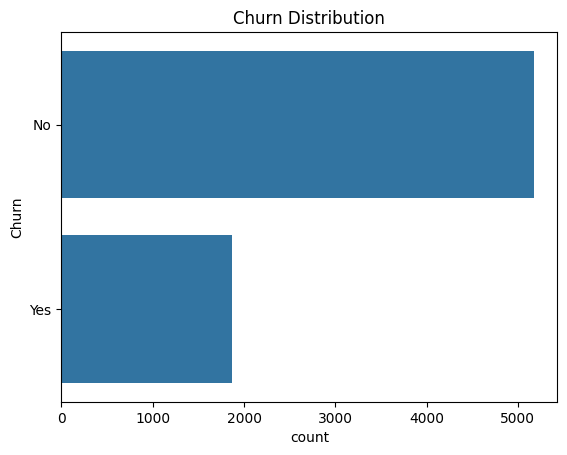

In [4]:
#1st visualization (Bar plot: shows how many customers have churned versus those who have not)
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

In [5]:
#drop column that doesn't help in predicting customer behavior
data = data.drop(['customerID'], axis=1, errors='ignore')


In [6]:
# Turn categories in the data into numbers (0 or 1) so the model can understand them
# `drop_first=True` removes the first column created to avoid having extra, unnecessary information
data = pd.get_dummies(data, drop_first=True)


In [7]:
# Print a message to indicate that we are checking for missing values after processing the data
print("\nCheck for missing values after processing:")
# Show the number of missing values in each column of the dataset
print(data.isnull().sum()) 


Check for missing values after processing:
SeniorCitizen          0
tenure                 0
MonthlyCharges         0
gender_Male            0
Partner_Yes            0
                      ..
TotalCharges_998.1     0
TotalCharges_999.45    0
TotalCharges_999.8     0
TotalCharges_999.9     0
Churn_Yes              0
Length: 6560, dtype: int64


In [8]:
# X includes all columns in the dataset except the 'Churn_Yes' column
X = data.drop('Churn_Yes', axis=1)
# y includes only the 'Churn_Yes' column (the value we want to predict) 
y = data['Churn_Yes'] 

In [9]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a logistic regression model with a maximum of 1000 iterations to find the best fit
model = LogisticRegression(max_iter=1000) 
# Train the model using the training data (X_train and y_train)
model.fit(X_train, y_train) 

LogisticRegression(max_iter=1000)

In [11]:
# Use the trained model to predict the churn for the test data (X_test) to gives the predicted output (churn or no churn) for each customer in the test set
y_pred = model.predict(X_test) 
# Predict the probability of churn for each customer in the test data (X_test)
# The [ : , 1 ] selects the probabilities for customers likely to churn
y_pred_proba = model.predict_proba(X_test)[:, 1] 

In [12]:
print("\nModel Evaluation:")
# Print the accuracy of the model, which shows the percentage of correct predictions out of all predictions
print('Accuracy:', accuracy_score(y_test, y_pred))
print("\nClassification Report:")
# helps to understand how well the model is performing for predicting both churn and no-churn cases
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8239886444286728

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1036
        True       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



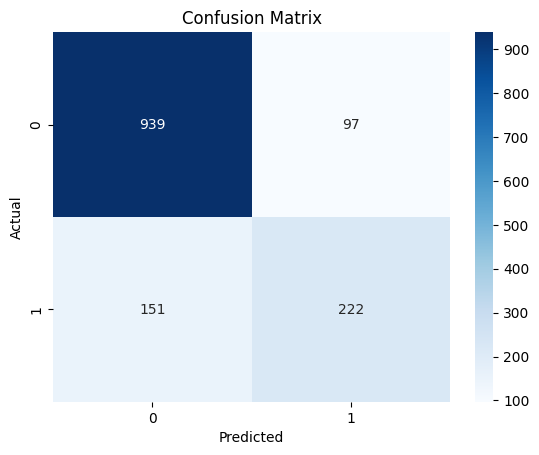

In [13]:
#2nd visualization (Heatmap: shows how well the model is predicting churn(1) versus non-churn(0))
#Test set will contain 1409 customers, derived from the support values in the classification report 
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

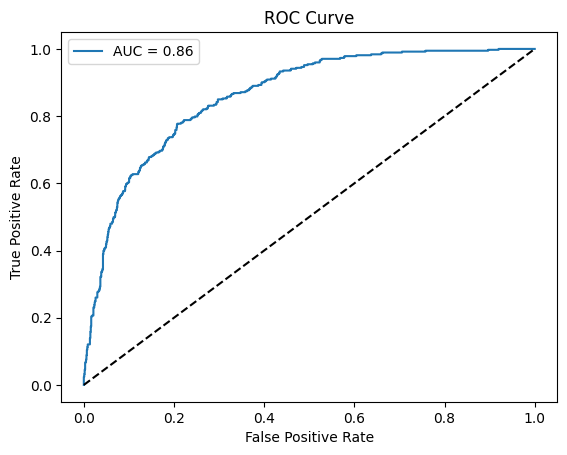

In [14]:
#3rd visualization (ROC curve Plot: model's ability to distinguish between the positive (churn) and negative (no churn) classes)
#AUC value (closer to 1) means the model is good in correctly predicting both churners and non-churners
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
# Make a copy
X_test_copy = X_test.copy()
# Add a new column to the copied test data that shows the predicted probability of churn for each customer
X_test_copy['Predicted_Probability_of_Churn'] = y_pred_proba
# Add new column that assigns a churn status based on the predicted probability
X_test_copy['Predicted_Churn_Status'] = np.where(X_test_copy['Predicted_Probability_of_Churn'] > 0.5, 'Likely to Churn', 'Not Likely to Churn')

In [16]:
# Sort customers with the highest likelihood of churn in descending order
top_churn_risk_customers = X_test_copy.sort_values(by='Predicted_Probability_of_Churn', ascending=False).head(10)
print("\nTop 10 Customers Likely to Churn:")
# Print the details of the top 10 customers who are most likely to churn based on the model's predictions
print(top_churn_risk_customers)


Top 10 Customers Likely to Churn:
      SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
3467              1       5           91.40         True        False   
2208              1       1          100.80        False         True   
1410              1       2           93.85        False        False   
4800              1       1           94.00         True        False   
1436              0       2           91.40        False        False   
2577              0       1           94.60        False        False   
534               0       1           85.00        False        False   
6089              1       1           90.60        False         True   
122               0       3           74.40         True        False   
3346              1       2           84.05        False        False   

      Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
3467           False              True                           False   
2208         